# ML6 - Wine Quality

In [2]:
# Import Required Libraries 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
 
# Read in white wine data
white = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep =';')
 
# Read in red wine data
red = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep =';')


In [3]:
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
red.shape

(1599, 12)

In [9]:
white.shape

(4898, 12)

In [10]:
red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [11]:
white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


Good to see, that there are no missing values!

Text(0.5, 0.98, 'Distribution of Alcohol in % Vol')

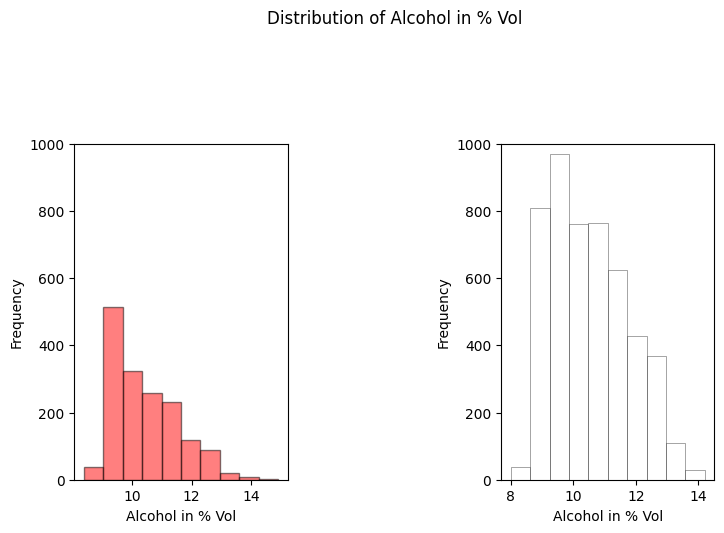

In [23]:
fig, ax = plt.subplots(1, 2)  # (1, 2) -> one figure with 2 plots in it

ax[0].hist(red.alcohol, 10, facecolor ='red', ec='black', alpha=0.5, label='Red Wine')  # ax[0] = bottom left
ax[1].hist(white.alcohol, 10, facecolor ='white', ec='black', lw=0.5, alpha=0.5, label='White Wine') # ax[1] = bottom right

fig.subplots_adjust(left = 0, right = 1, bottom = 0, top = 0.7, hspace = 0.05, wspace = 1)

ax[0].set_ylim([0, 1000])               # setting the axes similar to eachother
ax[0].set_xlabel("Alcohol in % Vol")
ax[0].set_ylabel("Frequency")
ax[1].set_ylim([0, 1000])               # both now reach from 0 to 1000
ax[1].set_xlabel("Alcohol in % Vol")
ax[1].set_ylabel("Frequency")
 
fig.suptitle("Distribution of Alcohol in % Vol") # setting the main title

## Preparing the combination of Dataframes

In [25]:
red['type'] = 1
white['type'] = 0

white.sample()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
4840,6.8,0.34,0.36,8.9,0.029,44.0,128.0,0.99318,3.28,0.35,11.95,7,0


In [26]:
red.sample()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
565,12.7,0.6,0.49,2.8,0.075,5.0,19.0,0.9994,3.14,0.57,11.4,5,1


In [28]:
# combining the dataframes
wines = pd.concat([red, white], ignore_index=True)
wines

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [29]:
# getting the train/test split

from sklearn.model_selection import train_test_split

X = wines.iloc[:, 0:11] # we leave out the quality rating column because it confuses our neural network
y = np.ravel(wines.type)

X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


In [30]:
y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [31]:
# Splitting the data set for training and validating 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.34, random_state = 45)

In [36]:
import warnings
warnings.filterwarnings('ignore')

# Import `Sequential` from `tensorflow.keras.models`
from tensorflow.keras.models import Sequential

# Import `Dense` from `tensorflow.keras.layers`
from tensorflow.keras.layers import Dense
 
# Initialize the constructor
model = Sequential()
 
# Add an input layer
model.add(Dense(12, activation ='relu', input_shape =(11, )))
 
# Add one hidden layer
model.add(Dense(9, activation ='relu'))
 
# Add an output layer
model.add(Dense(1, activation ='sigmoid'))
 
# Model output shape
model.output_shape
 
# Model summary
model.summary()
 
# Model config
model.get_config()
 
# List all weight tensors
model.get_weights()
model.compile(loss ='binary_crossentropy', 
  optimizer ='adam', metrics =['accuracy'])


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 12)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 9)              │           117 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            10 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 271 (1.06 KB)

 Trainable params: 271 (1.06 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
# Training Model
model.fit(X_train, y_train, epochs = 3,
           batch_size = 1, verbose = 1)
  
# Predicting the Value
y_pred = model.predict(X_test)

print(y_pred)


Epoch 1/3
4288/4288 ━━━━━━━━━━━━━━━━━━━━ 4s 631us/step - accuracy: 0.8687 - loss: 0.7236
Epoch 2/3
4288/4288 ━━━━━━━━━━━━━━━━━━━━ 3s 600us/step - accuracy: 0.9335 - loss: 0.1976
Epoch 3/3
4288/4288 ━━━━━━━━━━━━━━━━━━━━ 3s 638us/step - accuracy: 0.9493 - loss: 0.1381
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[[0.02072676]
 [0.02159688]
 [0.00750218]
 ...
 [0.03244459]
 [0.01507711]
 [0.00086821]]


So we see, as we went further with our training we coul improve our accuracy by about ```7%``` from 
```86.87%``` to ```94.93%```.

Epoch 1/3
4288/4288 ━━━━━━━━━━━━━━━━━━━━ 3s 600us/step - accuracy: 0.9558 - loss: 0.1293
Epoch 2/3
4288/4288 ━━━━━━━━━━━━━━━━━━━━ 3s 604us/step - accuracy: 0.9582 - loss: 0.1324
Epoch 3/3
4288/4288 ━━━━━━━━━━━━━━━━━━━━ 3s 610us/step - accuracy: 0.9680 - loss: 0.1009
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 607us/step
Test Accuracy: 0.9479
Confusion Matrix:
 [[1638    3]
 [ 112  456]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      1641
           1       0.99      0.80      0.89       568

    accuracy                           0.95      2209
   macro avg       0.96      0.90      0.93      2209
weighted avg       0.95      0.95      0.95      2209



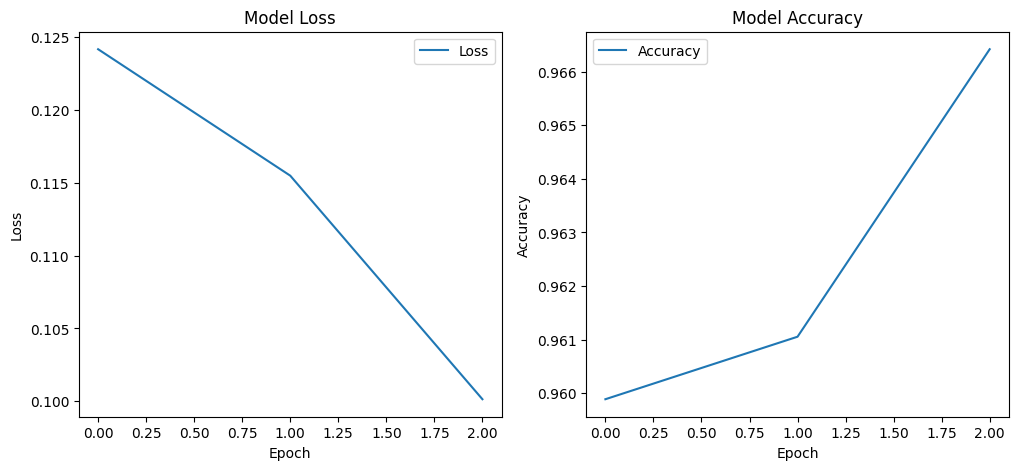

In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Train the model and get the history object
history = model.fit(X_train, y_train, epochs=3, batch_size=1, verbose=1)

# Convert probabilities to binary predictions (0 or 1)
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred_binary)
print(f"Test Accuracy: {accuracy:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred_binary)
print("Classification Report:\n", class_report)

# Plot training loss and accuracy
plt.figure(figsize=(12, 5))

# Loss Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()

# Accuracy Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()

plt.show()


Thats it for this one!

What i've learned:

* First time working with tensorflow
* understood some of the methods 
* importing datasets from the web
* working with a neural network and layers